### Transposing Arrays and Swapping Axes
Transposing is a special form of reshaping that similarly returns a view on the underlying data without copying anything. Arrays have the `transpose` method and the special `T` attribute:



In [ ]:
import numpy as np

In [ ]:
arr = np.arange(15).reshape((3, 5))
arr

In [ ]:
arr.T

When doing matrix computations, you may do this very often—for example, when computing the inner matrix product using numpy.dot:

In [ ]:
arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])
print(arr)


In [ ]:
arr * arr

In [ ]:
np.dot(arr.T, arr)

The `@` infix operator is another way to do matrix multiplication:

In [ ]:
arr.T @ arr

Simple transposing with .T is a special case of swapping axes. ndarray has the method swapaxes, which takes a pair of axis numbers and switches the indicated axes to rearrange the data:

In [ ]:
arr = np.random.randint(0,10,(3,5,6))
print(arr)

In [ ]:
arr.swapaxes(0, 1)

swapaxes similarly returns a view on the data without making a copy.

# Pseudorandom Number Generation

The `numpy.random` module supplements the built-in Python `random` module with functions for efficiently generating whole arrays of sample values from many kinds of probability distributions. For example, you can get a 4 × 4 array of samples from the standard normal distribution using `numpy.random.standard_normal`:

In [ ]:
samples = np.random.standard_normal(size=(4, 4))
samples

Python’s built-in `random` module, by contrast, samples only one value at a time. As you can see from this benchmark, `numpy.random` is well over an order of magnitude faster for generating very large samples:

In [ ]:
from random import normalvariate
N = 1_000_000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.standard_normal(N)

These random numbers are not truly random (rather, pseudorandom) but instead are generated by a configurable random number generator that determines deterministically what values are created. Functions like `numpy.random.standard_normal` use the `numpy.random` module's default random number generator, but your code can be configured to use an explicit generator:

In [ ]:
rng = np.random.default_rng(seed=5412)
data = rng.standard_normal((2, 3))
print(data)
data = rng.standard_normal((2, 3))
print(data)
data = rng.standard_normal((2, 3))
print(data)
data = rng.standard_normal((2, 3))
print(data)

The `seed` argument is what determines the initial state of the generator, and the state changes each time the rng object is used to generate data. The generator object rng is also isolated from other code which might use the `numpy.random` module:

In [ ]:
type(rng)

In [ ]:
np.random.permutation([1, 4, 9, 12, 15])



See Table 4.3 for a partial list of methods available on random generator objects like `rng.` I will use the rng object I created above to generate random data throughout the rest of the chapter.

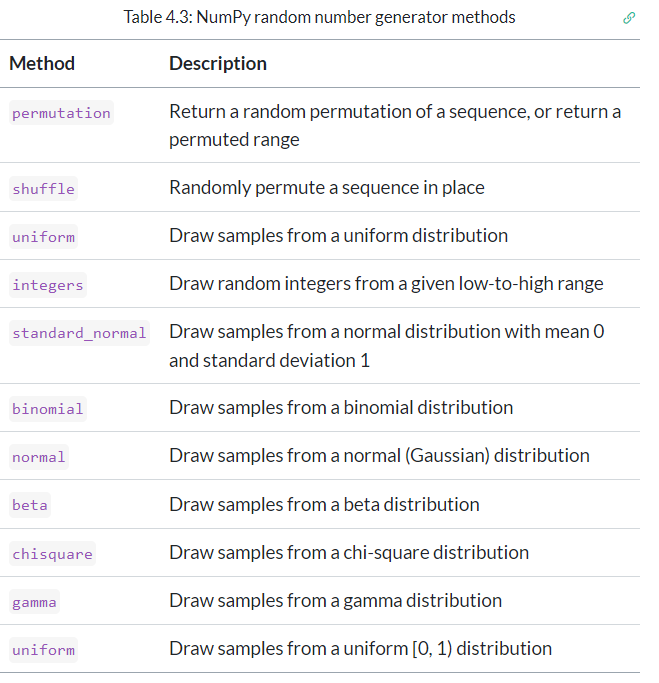

## Universal Functions: Fast Element-Wise Array Functions

A universal function, or ufunc, is a function that performs element-wise operations on data in ndarrays. You can think of them as fast vectorized wrappers for simple functions that take one or more scalar values and produce one or more scalar results.

Many ufuncs are simple element-wise transformations, like `numpy.sqrt` or `numpy.exp`:

In [ ]:
arr = np.arange(10)
print(arr)
print("sqrt",np.sqrt(arr))
print("exp",np.exp(arr))

These are referred to as unary ufuncs. 

Others, such as `numpy.add` or `numpy.maximum`, take two arrays (thus, binary ufuncs) and return a single array as the result:

In [ ]:
x = rng.standard_normal(8)
y = rng.standard_normal(8)
print("x",x)
print("y",y)
np.maximum(x, y)

In this example, `numpy.maximum` computed the element-wise maximum of the elements in x and y.

While not common, a ufunc can return multiple arrays. `numpy.modf` is one example: a vectorized version of the built-in Python `math.modf`, it returns the fractional and integral parts of a floating-point array:

In [ ]:
arr = rng.standard_normal(7) * 5
print(arr)
remainder, whole_part = np.modf(arr)
print(remainder)
print(whole_part)

Ufuncs accept an optional `out` argument that allows them to assign their results into an existing array rather than create a new one:

In [ ]:
arr

In [ ]:
out = rng.standard_normal(6)

In [ ]:
out

In [ ]:
np.add(arr ,1, out= out)

In [ ]:
out

In [ ]:
print("before",arr)
out = np.zeros_like(arr)
np.add(arr, 1)
print("after",arr)
np.add(arr, 1, out=out)
out

See Tables Table 4.4 and Table 4.5 for a listing of some of NumPy's ufuncs. New ufuncs continue to be added to NumPy, so consulting the online NumPy documentation is the best way to get a comprehensive listing and stay up to date.

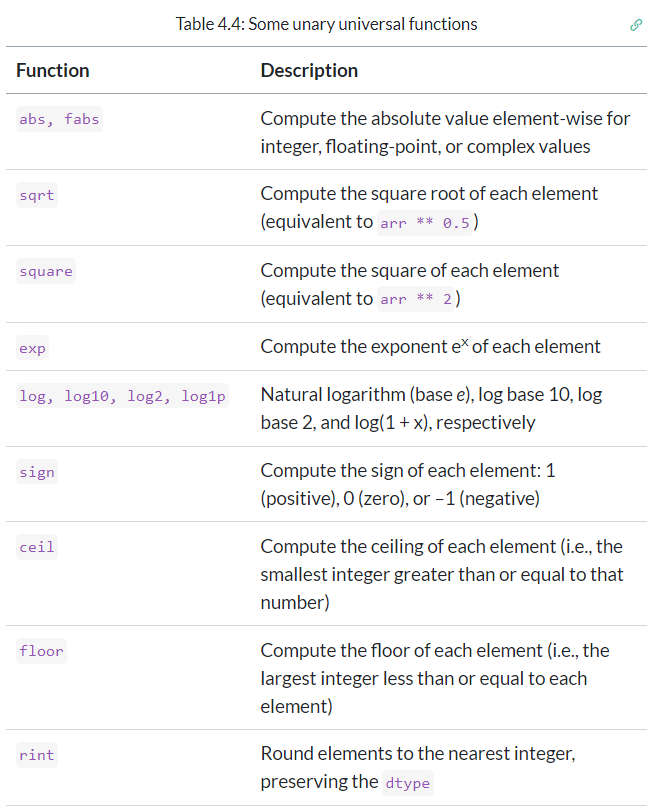
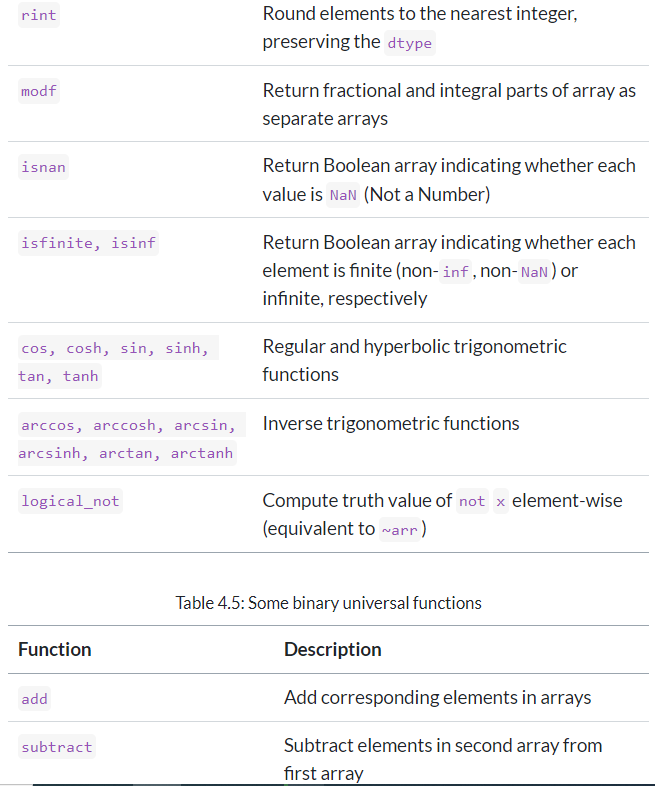
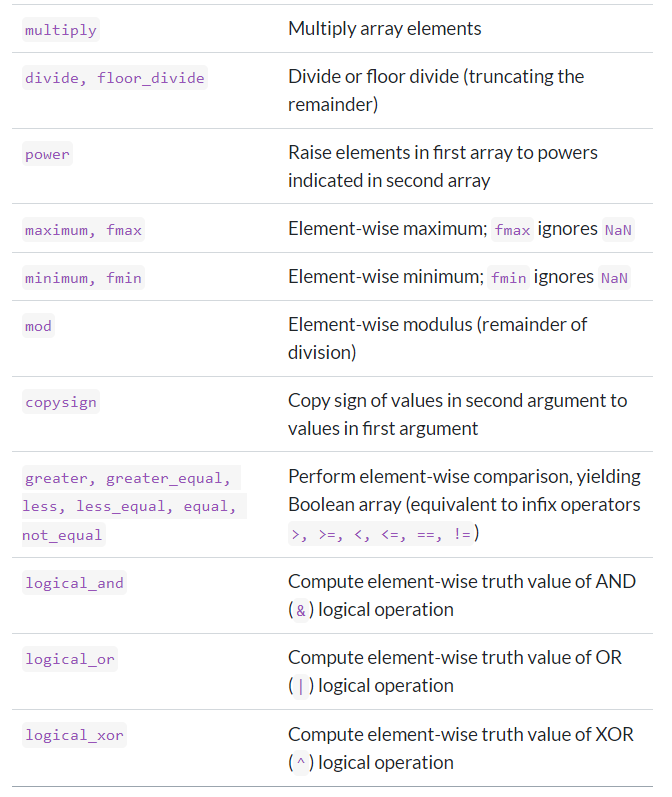

##  Array-Oriented Programming with Arrays

Using NumPy arrays enables you to express many kinds of data processing tasks as concise array expressions that might otherwise require writing loops. This practice of replacing explicit loops with array expressions is referred to by some people as vectorization. In general, vectorized array operations will usually be significantly faster than their pure Python equivalents, with the biggest impact in any kind of numerical computations.

As a simple example, suppose we wished to evaluate the function `sqrt(x^2 + y^2)` across a regular grid of values. The `numpy.meshgrid` function takes two one-dimensional arrays and produces two two-dimensional matrices corresponding to all pairs of `(x, y)` in the two arrays:

In [2]:
import numpy as np

In [5]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
print(len(points))
xs, ys = np.meshgrid(points, points)
print(xs,"\n\n",ys)

1000
[[-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 ...
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]] 

 [[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]


Now, evaluating the function is a matter of writing the same expression you would write with two points:

In [6]:
z = np.sqrt(xs ** 2 + ys ** 2)
print(z.shape)
z

(1000, 1000)


array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

As a preview of Ch 9: Plotting and Visualization, I use matplotlib to create visualizations of this two-dimensional array:

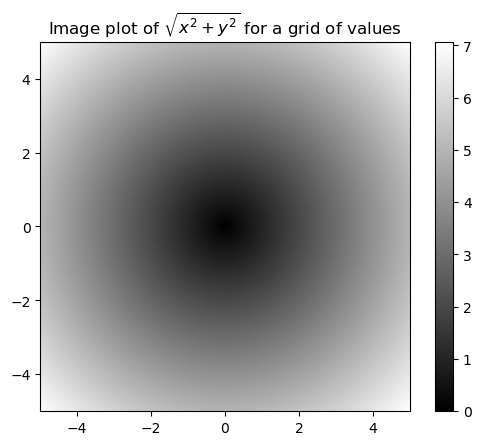

In [7]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.draw()

In Plot of function evaluated on a grid, I used the matplotlib function imshow to create an image plot from a two-dimensional array of function values.


If you're working in IPython, you can close all open plot windows by executing plt.close("all"):

In [8]:
plt.close("all")

## Expressing Conditional Logic as Array Operations

The `numpy.where` function is a vectorized version of the ternary expression `x if condition else y`. Suppose we had a Boolean array and two arrays of values:

In [9]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])



Suppose we wanted to take a value from xarr whenever the corresponding value in cond is True, and otherwise take the value from yarr. A list comprehension doing this might look like:

In [10]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

This has multiple problems. First, it will not be very fast for large arrays (because all the work is being done in interpreted Python code). Second, it will not work with multidimensional arrays. With numpy.where you can do this with a single function call:


In [11]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

The second and third arguments to numpy.where don’t need to be arrays; one or both of them can be scalars. A typical use of where in data analysis is to produce a new array of values based on another array. Suppose you had a matrix of randomly generated data and you wanted to replace all positive values with 2 and all negative values with –2. This is possible to do with numpy.where:



In [18]:
rng = np.random.default_rng(seed=5412)

arr = rng.standard_normal((4, 4,4,4))
print(arr)
print(arr > 0)
np.where(arr > 0, 2, -2)

[[[[ 9.81722177e-01 -6.00225482e-01  5.12213505e-01  5.28165429e-01]
   [-1.91969581e-01  3.96342609e-01 -1.82264716e+00  1.14980136e+00]
   [-2.22056548e-04 -1.17956888e-01  2.61363754e-01  1.50231302e+00]
   [ 2.13331485e-01 -6.49899631e-01  1.57455037e-01 -4.24310085e-01]]

  [[ 8.24615528e-01  4.48463902e-01 -1.30244738e+00  7.38054421e-01]
   [ 7.05619003e-01 -1.04164917e+00 -1.72853904e+00  5.43870521e-01]
   [-1.62042971e+00 -1.82661639e+00  1.33846395e+00  1.14569389e+00]
   [ 3.29855854e-02 -1.62948331e+00 -1.81011104e-01 -7.71103847e-03]]

  [[-2.04061615e+00 -1.80122437e+00  5.56062560e-01 -3.55314268e-01]
   [-2.85064634e-02 -1.42339144e+00  1.27285411e+00 -6.08947485e-01]
   [ 3.46585375e-01 -1.76267758e+00  1.73957308e-01 -4.89216352e-02]
   [-3.36694775e-01 -5.06862543e-01 -1.91047213e-01  5.43161863e-01]]

  [[-2.31486001e+00  4.38019536e-02  7.53961576e-01  1.00296642e+00]
   [-1.53361229e+00 -9.15394608e-01  1.19006772e+00 -1.41391381e+00]
   [-1.25239094e+00 -3.30191

array([[[[ 2, -2,  2,  2],
         [-2,  2, -2,  2],
         [-2, -2,  2,  2],
         [ 2, -2,  2, -2]],

        [[ 2,  2, -2,  2],
         [ 2, -2, -2,  2],
         [-2, -2,  2,  2],
         [ 2, -2, -2, -2]],

        [[-2, -2,  2, -2],
         [-2, -2,  2, -2],
         [ 2, -2,  2, -2],
         [-2, -2, -2,  2]],

        [[-2,  2,  2,  2],
         [-2, -2,  2, -2],
         [-2, -2,  2, -2],
         [-2,  2, -2,  2]]],


       [[[-2, -2,  2,  2],
         [ 2, -2, -2,  2],
         [ 2, -2, -2,  2],
         [ 2,  2,  2, -2]],

        [[-2, -2, -2, -2],
         [-2,  2,  2,  2],
         [ 2,  2,  2, -2],
         [-2, -2, -2, -2]],

        [[ 2,  2,  2, -2],
         [ 2,  2,  2, -2],
         [-2, -2,  2, -2],
         [-2,  2, -2, -2]],

        [[ 2,  2,  2,  2],
         [-2, -2,  2, -2],
         [-2, -2,  2,  2],
         [ 2, -2,  2, -2]]],


       [[[-2, -2,  2, -2],
         [-2, -2, -2,  2],
         [ 2, -2, -2, -2],
         [ 2, -2, -2, -2]],

      

You can combine scalars and arrays when using numpy.where. For example, I can replace all positive values in arr with the constant 2, like so:

In [15]:
np.where(arr > 1, 1, arr) # set only positive values to 2

array([[ 9.81722177e-01, -6.00225482e-01,  5.12213505e-01,
         5.28165429e-01],
       [-1.91969581e-01,  3.96342609e-01, -1.82264716e+00,
         1.00000000e+00],
       [-2.22056548e-04, -1.17956888e-01,  2.61363754e-01,
         1.00000000e+00],
       [ 2.13331485e-01, -6.49899631e-01,  1.57455037e-01,
        -4.24310085e-01]])

In [19]:
np.where(arr > 0)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
        3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
        3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3], dtype=int64),
 array([0, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 0, 1, 1, 2, 2, 3, 0, 1, 2, 2, 3,
        0, 0, 0, 1, 2, 3, 3, 0, 0, 1, 1, 2, 2, 3, 3, 3, 1, 1, 1, 2, 

In [17]:
a,b = np.where(arr > 0)
print(a,b)

[0 0 0 1 1 2 2 3 3] [0 2 3 1 3 2 3 0 2]


In [ ]:
for x,y in zip(a,b):
    arr[x,y] = np.sqrt(arr[x,y]) + 1000
print(arr)

## Mathematical and Statistical Methods

A set of mathematical functions that compute statistics about an entire array or about the data along an axis are accessible as methods of the array class. You can use aggregations (sometimes called reductions) like sum, mean, and std (standard deviation) either by calling the array instance method or using the top-level NumPy function. When you use the NumPy function, like numpy.sum, you have to pass the array you want to aggregate as the first argument.

Here I generate some normally distributed random data and compute some aggregate statistics:

In [20]:
arr = rng.standard_normal((5, 4))
print(arr)
print("arr.mean()",arr.mean())
print("np.mean(arr)",np.mean(arr))
print("arr.sum())",arr.sum())
print("np.sum(arr)",np.sum(arr))



[[-0.05135182  1.65652659  0.93374151  0.09910404]
 [ 1.52856675  0.19853533  0.68816286 -1.60929113]
 [ 0.59276432  0.90373431  1.45370013  1.37659218]
 [ 0.76085356 -0.54542505  0.46647236  0.50382444]
 [-0.677775   -0.56005177  0.70934989 -1.01754683]]
arr.mean() 0.37052433427639464
np.mean(arr) 0.37052433427639464
arr.sum()) 7.410486685527893
np.sum(arr) 7.410486685527893


Functions like `mean` and `sum` take an optional `axis` argument that computes the statistic over the given axis, resulting in an array with one less dimension:

In [22]:
print(arr.mean(axis=0))

[ 0.43061156  0.33066388  0.85028535 -0.12946346]


In [23]:
arr.sum(axis=0)

array([ 2.15305782,  1.65331941,  4.25142675, -0.64731729])

Here, `arr.mean(axis=1)` means "compute mean across the columns," where `arr.sum(axis=0)` means "compute sum down the rows."

Other methods like `cumsum` and `cumprod` do not aggregate, instead producing an array of the intermediate results:

In [29]:
arr = np.array([0, 1, 2, 8, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3, 11, 15, 20, 26, 33])

In multidimensional arrays, accumulation functions like `cumsum` return an array of the same size but with the partial aggregates computed along the indicated axis according to each lower dimensional slice:

In [33]:
np.argmax(arr)

8

In [25]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

The expression `arr.cumsum(axis=0)` computes the cumulative sum along the rows, while `arr.cumsum(axis=1)` computes the sums along the columns:

In [26]:
print(arr.cumsum(axis=0))
print(arr.cumsum(axis=1))

[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
[[ 0  1  3]
 [ 3  7 12]
 [ 6 13 21]]


See Table 4.6 for a full listing. We’ll see many examples of these methods in action in later chapters.

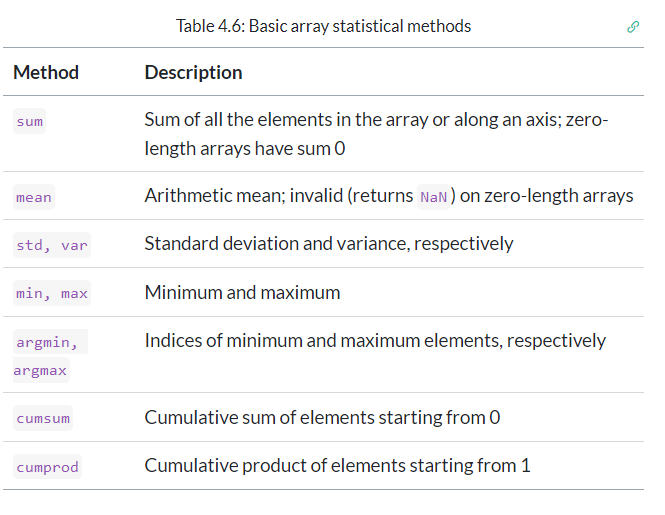

## Methods for Boolean Arrays
Boolean values are coerced to 1 (`True`) and 0 (`False`) in the preceding methods. Thus, `sum` is often used as a means of counting `True` values in a Boolean array:

In [35]:
arr = rng.standard_normal(100)
print((arr > 0).sum()) # Number of positive values
(arr <= 0).sum() # Number of non-positive values

55


45

The parentheses here in the expression `(arr > 0).sum()` are necessary to be able to call `sum()` on the temporary result of `arr > 0`.

Two additional methods, `any` and `all`, are useful especially for Boolean arrays. any tests whether one or more values in an array is `True`, while `all` checks if every value is `True`:

In [36]:
bools = np.array([False, False, True, False])
print(bools.any())
bools.all()

True


False

These methods also work with non-Boolean arrays, where nonzero elements are treated as `True`.

## Sorting
Like Python’s built-in list type, NumPy arrays can be sorted in place with the `sort` method:

In [41]:
arr = rng.standard_normal(6)
print(arr)
arr.sort()
print(arr2)

[-0.05026541  1.40450254  0.6792242   0.14956484 -1.48899289 -0.330591  ]
[-1.79558018 -1.33779267 -1.24685054  0.01159572  0.53313647  0.85839342]


You can sort each one-dimensional section of values in a multidimensional array in place along an axis by passing the axis number to `sort`. In this example data:

In [42]:
arr = rng.standard_normal((5, 3))
arr

array([[ 0.72781912, -1.32504127, -0.73045985],
       [-0.18087729, -0.57704643, -1.14174006],
       [ 0.0298633 , -0.15344246, -0.22855275],
       [-1.03816514,  0.29815602, -0.21340573],
       [ 1.05995451, -0.11584164,  0.69395986]])

`arr.sort(axis=0)` sorts the values within each column, while 
`arr.sort(axis=1)` sorts across each row:

In [43]:
arr.sort(axis=0)
print(arr)

[[-1.03816514 -1.32504127 -1.14174006]
 [-0.18087729 -0.57704643 -0.73045985]
 [ 0.0298633  -0.15344246 -0.22855275]
 [ 0.72781912 -0.11584164 -0.21340573]
 [ 1.05995451  0.29815602  0.69395986]]


The top-level method `numpy.sort` returns a sorted copy of an array (like the Python built-in function `sorted`) instead of modifying the array in place. For example:

In [44]:
arr2 = np.array([5, -10, 7, 1, 0, -3])
sorted_arr2 = np.sort(arr2)
sorted_arr2

array([-10,  -3,   0,   1,   5,   7])

For more details on using NumPy’s sorting methods, and more advanced techniques like indirect sorts, see Appendix A: Advanced NumPy. Several other kinds of data manipulations related to sorting (e.g., sorting a table of data by one or more columns) can also be found in pandas.

## Unique and Other Set Logic
NumPy has some basic set operations for one-dimensional ndarrays. A commonly used one is numpy.unique, which returns the sorted unique values in an array:

In [45]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
print(np.unique(names))
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

['Bob' 'Joe' 'Will']


array([1, 2, 3, 4])


Another function, numpy.in1d, tests membership of the values in one array in another, returning a Boolean array:

In [46]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

See Table 4.7 for a listing of array set operations in NumPy.

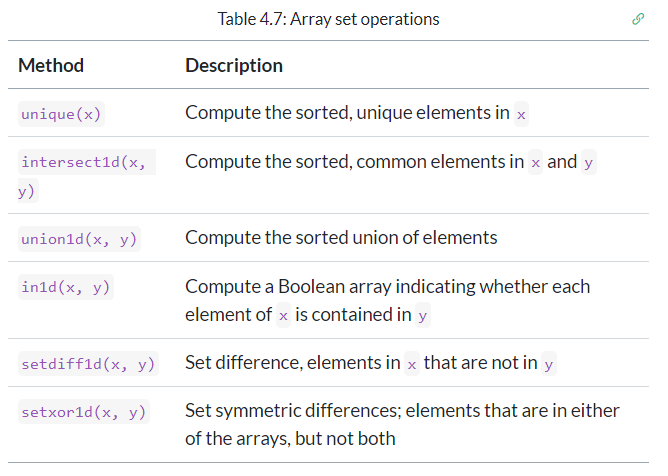

# File Input and Output with Arrays
NumPy is able to save and load data to and from disk in some text or binary formats. In this section I discuss only NumPy's built-in binary format, since most users will prefer pandas and other tools for loading text or tabular data (see Ch 6: Data Loading, Storage, and File Formats for much more).

numpy.save and numpy.load are the two workhorse functions for efficiently saving and loading array data on disk. Arrays are saved by default in an uncompressed raw binary format with file extension .npy:

In [50]:
arr = np.arange(10)
arr2 = np.arange(20)
np.save("some_array", arr)

If the file path does not already end in .npy, the extension will be appended. The array on disk can then be loaded with numpy.load:

In [49]:
np.load("some_array.npy")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

You can save multiple arrays in an uncompressed archive using numpy.savez and passing the arrays as keyword arguments:

In [51]:
np.savez("array_archive.npz", a=arr, b=arr2)

When loading an .npz file, you get back a dictionary-like object that loads the individual arrays lazily:

In [52]:
arch = np.load("array_archive.npz")
arch["b"]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

If your data compresses well, you may wish to use numpy.savez_compressed instead:

In [ ]:
np.savez_compressed("arrays_compressed.npz", a=arr, b=arr)

# Linear Algebra
Linear algebra operations, like matrix multiplication, decompositions, determinants, and other square matrix math, are an important part of many array libraries. Multiplying two two-dimensional arrays with * is an element-wise product, while matrix multiplications require either using the dot function or the @ infix operator. dot is both an array method and a function in the numpy namespace for doing matrix multiplication:

In [55]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x
y
x.dot(y)

array([[ 6., -2., 24.],
       [92., 35., 54.]])

x.dot(y) is equivalent to np.dot(x, y):

In [ ]:
np.dot(x, y)

A matrix product between a two-dimensional array and a suitably sized one-dimensional array results in a one-dimensional array:

In [ ]:
x @ np.ones(3)

numpy.linalg has a standard set of matrix decompositions and things like inverse and determinant:

In [56]:
from numpy.linalg import inv
X = rng.standard_normal((5, 5))
mat = X.T @ X
inv(mat)
mat @ inv(mat)

array([[ 1.00000000e+00,  5.76725717e-16,  2.50254302e-16,
         1.04309805e-16, -5.29042405e-16],
       [-4.05770371e-16,  1.00000000e+00,  7.34906610e-16,
        -3.09723366e-16, -6.19947962e-16],
       [ 2.21395487e-15, -1.11387340e-15,  1.00000000e+00,
         8.18126157e-16,  5.68717886e-16],
       [-1.86388908e-16, -8.66171111e-16,  4.64426664e-16,
         1.00000000e+00, -4.69986034e-16],
       [ 1.67299382e-15, -2.88306879e-16, -3.56015302e-16,
        -1.89700286e-16,  1.00000000e+00]])

The expression X.T.dot(X) computes the dot product of X with its transpose X.T.

See Table 4.8 for a list of some of the most commonly used linear algebra functions

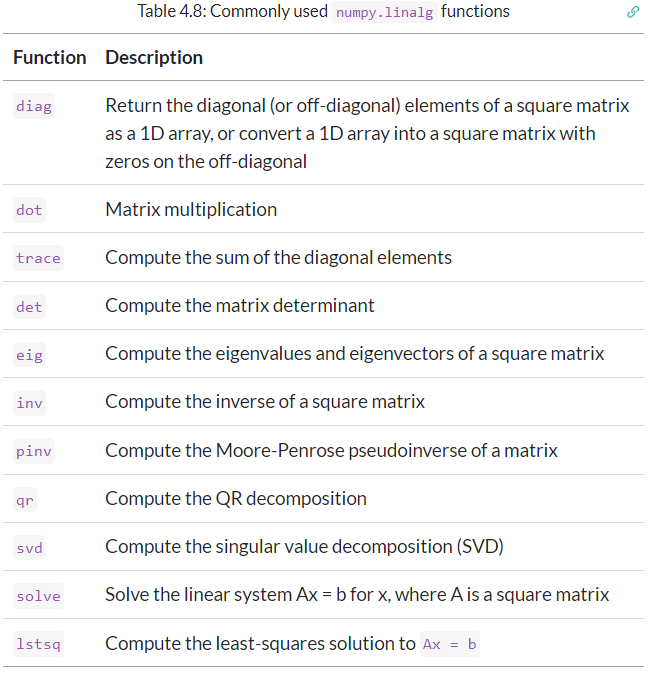

## Example: Random Walks

The simulation of random walks provides an illustrative application of utilizing array operations. Let’s first consider a simple random walk starting at 0 with steps of 1 and –1 occurring with equal probability.

Here is a pure Python way to implement a single random walk with 1,000 steps using the built-in random module:

In [63]:
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)


See Figure 4.4 for an example plot of the first 100 values on one of these random walks:

In [64]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

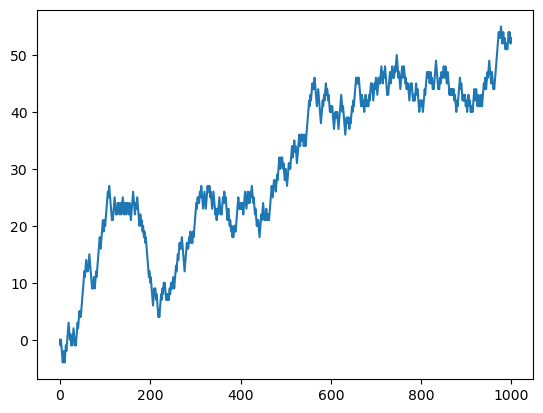

In [65]:
plt.plot(walk[:1000])


You might make the observation that walk is the cumulative sum of the random steps and could be evaluated as an array expression. Thus, I use the numpy.random module to draw 1,000 coin flips at once, set these to 1 and –1, and compute the cumulative sum:

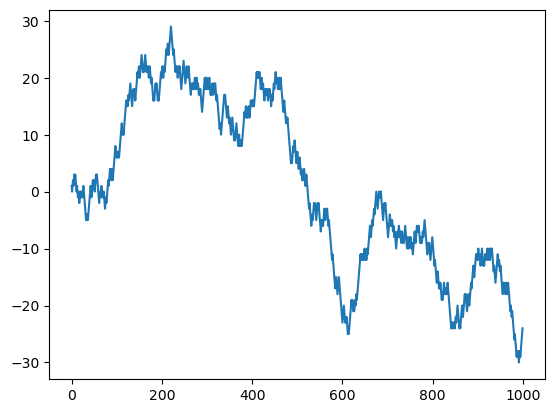

In [68]:
nsteps = 1000
rng = np.random.default_rng(seed=5454)  # fresh random generator
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 1, 1, -1)
walk = steps.cumsum()

plt.plot(walk[:1000])

From this we can begin to extract statistics like the minimum and maximum value along the walk’s trajectory:

In [69]:
print(f"min {walk.min()} , max {walk.max()}")

min -30 , max 29


A more complicated statistic is the first crossing time, the step at which the random walk reaches a particular value. Here we might want to know how long it took the random walk to get at least 10 steps away from the origin 0 in either direction. np.abs(walk) >= 10 gives us a Boolean array indicating where the walk has reached or exceeded 10, but we want the index of the first 10 or –10. Turns out, we can compute this using argmax, which returns the first index of the maximum value in the Boolean array (True is the maximum value):

In [70]:
(np.abs(walk) >= 10).argmax()

109

Note that using argmax here is not always efficient because it always makes a full scan of the array. In this special case, once a True is observed we know it to be the maximum value.

